In [1]:
import matplotlib.pyplot as plt
import imageio as imo
import numpy as np
import scipy.ndimage as ndi
import cv2

In [2]:
im = imo.imread('../datasets/azm/IM-0009-0454.dcm')
#im.meta

(-0.5, 511.5, 511.5, -0.5)

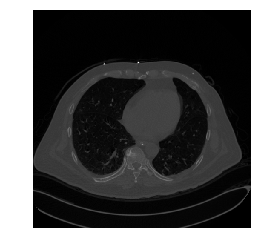

In [3]:
plt.imshow(im, cmap='gray')
plt.axis('off')

In [4]:
path = '../datasets/azm/'

In [5]:
vol = imo.mvolread(path)

Reading DICOM (examining files): 1/1102 files (0.1%37/1102 files (3.479/1102 files (7.2121/1102 files (11.0163/1102 files (14.8202/1102 files (18.3243/1102 files (22.1284/1102 files (25.8326/1102 files (29.6368/1102 files (33.4415/1102 files (37.7457/1102 files (41.5499/1102 files (45.3539/1102 files (48.9584/1102 files (53.0625/1102 files (56.7666/1102 files (60.4706/1102 files (64.1746/1102 files (67.7780/1102 files (70.8817/1102 files (74.1859/1102 files (77.9900/1102 files (81.7941/1102 files (85.4982/1102 files (89.11023/1102 files (92.8%1063/1102 files (96.5%1102/1102 files (100.0%  Warn: sampling does not match.
Reading DICOM (examining files): 1102/1102 files (100.01102/1102 files (100.0%)
  Found 4 correct series.
Reading DICOM (loading data): 2/2  (100.0%)
Reading DICOM (loading data): 2/2  (100.0%)
Reading DICOM (loading data): 10/558  (1.838/558  (6.867/558  (12.0%93/558  (16.7%119/558  (21.3147/558  (26.3175/558  (31.4203/558  (36.4230/558  (41.2259/558  (46.4288/558  (51.

(-0.5, 511.5, 511.5, -0.5)

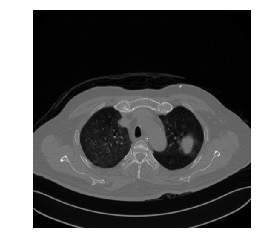

In [87]:
plt.imshow(vol[2][150], cmap='gray')
plt.axis('off')

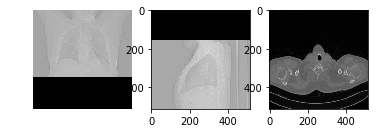

In [88]:
fig, axes = plt.subplots(nrows=1,
ncols=3)
axes[0].imshow(vol[0][1],cmap='gray')
axes[1].imshow(vol[1][0],cmap='gray')
axes[2].imshow(vol[2][0],cmap='gray')

for ax in axes:
    ax.axis('off')
    plt.show()

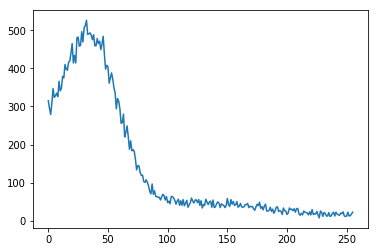

In [90]:
im = vol[2][150]
hist = ndi.histogram(im, min=0, max=255, bins=256)
plt.plot(hist)

In [91]:
filt = ndi.gaussian_filter(im, sigma=4)
mask = filt > 300
labels, nlabels = ndi.label(mask)

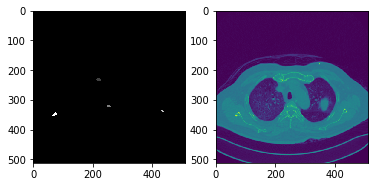

In [92]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].imshow(labels, cmap='gray')
axes[1].imshow(im)


(-0.5, 511.5, 511.5, -0.5)

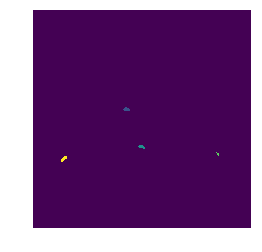

In [93]:
plt.imshow(labels)
plt.axis('off')

In [94]:
nlabels

4

In [95]:
boxes = ndi.find_objects(labels)
boxes[0]

(slice(228L, 238L, None), slice(212L, 229L, None))

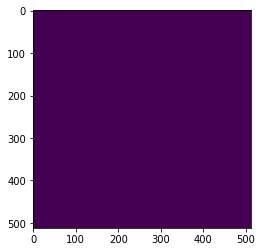

In [98]:
im_bin = ndi.binary_erosion(labels, iterations=2).astype(im.dtype)
plt.imshow(im_bin)

In [15]:
imo.imwrite('1.png', im_bin)

No handlers could be found for logger "imageio"


In [99]:
img_path = '../datasets/io_images/img/'
msk_path = '../datasets/io_images/msk/'
for i in range(len(vol[2])):
    im= vol[2][i]
    filt = ndi.gaussian_filter(im, sigma=4)
    mask = filt > 300
    labels, nlabels = ndi.label(mask)
    im_bin = ndi.binary_erosion(labels, iterations=2).astype(im.dtype)
    imo.imwrite(img_path+str(i)+'.png', im)
    imo.imwrite(msk_path+str(i)+'.png', im_bin)

    